# Lab 4 Report

## Group Members: Diego C.
## Group Name for Leaderboard: Dieglan

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats as st

### Exercise 1: Construct Dictionaries from Data

<img src="lab4_exercise1.png" width="1000">

In [12]:
def convert_csv_to_dict(file_path):
    # Read the csv
    file = pd.read_csv(file_path)
    # Make the data into an array
    file_arr = file.to_numpy()
    # Initialize a dict
    dict_object = {}
    # Make a key for all the columns and assign respective values to it at the same time
    for i in range(0, len(file.columns)): 
        dict_object[file.columns[i]] = file_arr[:, i]
    return dict_object

In [13]:
TSLA_dict = convert_csv_to_dict('TSLA.csv')

In [14]:
# Navigate to keys corresponding to 2nd and 4th columns (Open and Low prices) of TSLA.csv, 
# Print first 10 elements of each key.

TSLA_column2 = "Open"
TSLA_column4 = "Low"
print(TSLA_dict[TSLA_column2][:10])
print(TSLA_dict[TSLA_column4][:10])

[19.0 25.790001 25.0 23.0 20.0 16.4 16.139999 17.58 17.950001 17.389999]
[17.540001 23.299999 20.27 18.709999 15.83 14.98 15.57 16.549999 17.0 16.9]


In [15]:
diabetes_dict = convert_csv_to_dict('diabetes.csv')

In [16]:
# Navigate to keys corresponding to 2nd and 4th columns (Glucose and SkinThickness) of diabetes.csv, 
# Print first 10 elements of each key.

diabetes_column2 = "Glucose"
diabetes_column4 = "SkinThickness"
print(diabetes_dict[diabetes_column2][:10])
print(diabetes_dict[diabetes_column4][:10])

[148.  85. 183.  89. 137. 116.  78. 115. 197. 125.]
[35. 29.  0. 23. 35.  0. 32.  0. 45.  0.]


### Exercise 2: Bar graph with confidence intervals

<img src="lab4_exercise2.png" width="1000">

In [17]:
# Load diabetes.csv 
# Split the data into diabetic and non-diabetic

# Read the csv
diabetes = pd.read_csv('diabetes.csv')
# Turn the csv into an array to parse through
diabetes_arr = diabetes.to_numpy()
# Initialize an array to store values
yes_diabetes = [0] * 9
no_diabetes = [0] * 9
for i in range(0, len(diabetes_arr)):
    # Minus one because else with exceed the length since arrays start from index of 0
    if diabetes_arr[i, len(diabetes_arr[0]) - 1] == 1:
        # If diabetes is positive then move the row of data into a different array
        yes_diabetes = np.vstack([yes_diabetes, diabetes_arr[i, :]])
        # Delete the data from the old array so we can effectively split the data
    else:
        no_diabetes = np.vstack([no_diabetes, diabetes_arr[i, :]])
# Remove the row of zeroes used to initialize array
yes_diabetes = np.delete(yes_diabetes, 0, 0)
no_diabetes = np.delete(no_diabetes, 0, 0)

In [18]:
# Extract glucose, blood pressure, and BMI metrics from diabetic and non-diabetic

# non-diabetic metrics
non_diabetic_glucose = no_diabetes[:, 1]
non_diabetic_bp = no_diabetes[:, 2]
non_diabetic_bmi = no_diabetes[:, 5]

# diabetic metrics
diabetic_glucose = yes_diabetes[:, 1]
diabetic_bp = yes_diabetes[:, 2]
diabetic_bmi = yes_diabetes[:, 5]

non_diabetic_list = [non_diabetic_glucose, non_diabetic_bp, non_diabetic_bmi]
diabetic_list = [diabetic_glucose, diabetic_bp, diabetic_bmi]

non_diabetic_bar_labels = ['non_diabetic_glucose', 'non_diabetic_bp', 'non_diabetic_bmi']
diabetic_bar_labels = ['diabetic_glucose', 'diabetic_bp', 'diabetic_bmi']

In [22]:
def mean_confidence_interval(data, confidence):
    # Number of samples in the data
    n = len(data)
    # Mean and standard error mean of data
    m, se = np.mean(data), scipy.stats.sem(data)
    # Find the error we need to subtract or add to the mean to find the bounds of the confidence interval
    # The two arguments given to t.ppf are q and df
    # Actually takes 4 arguments, also takes loc and scale (q works with these 2) but if undeclared, default to 0 and 1
    # df: degrees of freedom (usually just number of samples - 1) - numbers of values in final calculation that are free to vary
    # q: there is probability q of getting outcomes less than or equal to x from a T distribution (bell distribution but heavier tails)
    # To get a 95% margin of error, you want 5% of the probability to be in the tails of the distribution. 
    # This is usually done symmetrically so that 2.5% is in each tail, so you would use q values of 0.025 and 0.975
    # t.ppf aka quantile function specifies the value of the random variable such that the probability of the variable being less than or
    # equal to that value equals the given probability
    err = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, err


def produce_bargraph_CI(data_vec_list, conf_level, bar_labels):
    # Each data list has 3 arrays, one for each bar on the bar graph. We will need to get the mean (m0) and the error (err)
    m0, err0 = mean_confidence_interval(data_vec_list[0], conf_level)
    m1, err1 = mean_confidence_interval(data_vec_list[1], conf_level)
    m2, err2 = mean_confidence_interval(data_vec_list[2], conf_level)
    # Put the means into a list
    means = [m0, m1, m2]
    # Put the errors into a list
    errors = [err0, err1, err2]
    # List of positions for bar graph plotting
    pos = [0, 1, 2]
    # Make the bars
    plt.bar(pos, means, color = 'blue', yerr = errors, width = 0.5, align = 'center', ecolor = 'grey', capsize = 30)
    # Assign the labels
    if data_vec_list == non_diabetic_list:
        plt.title('Non Diabetic Data Averages with CI')
    else:
        plt.title('Diabetic data Averages with CI')
    plt.xticks(pos, bar_labels)
    plt.show()

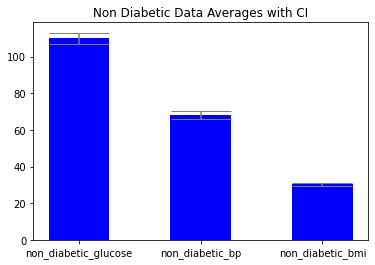

In [23]:
produce_bargraph_CI(data_vec_list = non_diabetic_list, conf_level = 0.99, bar_labels = non_diabetic_bar_labels)

<ipython-input-22-b0877b37fad8>:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if data_vec_list == non_diabetic_list:


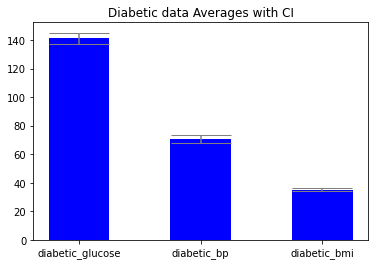

In [24]:
produce_bargraph_CI(data_vec_list = diabetic_list, conf_level = 0.95, bar_labels = diabetic_bar_labels)

### Exercise 3: Rolling Mean/Median Function from Scratch

<img src="lab4_exercise3.png" width="1000">

In [14]:
# Load stock datasets

tesla = pd.read_csv('TSLA.csv') 
tesla_np = tesla.to_numpy()

google = pd.read_csv('GOOGL.csv')
google_np = google.to_numpy()

dji = pd.read_csv('DJI.csv') 
dji_np = dji.to_numpy()

In [15]:
# Extract closing price for each stock data

tesla_np_closing = tesla_np[:, 4]
google_np_closing = google_np[:, 4]
DJI_np_closing = dji_np[:, 4]

In [36]:
def rolling_window(data, window_size):
    shape = data.shape[:-1] + (data.shape[-1] - window_size + 1, window_size)
    strides = data.strides + (data.strides[-1],)
    return np.lib.stride_tricks.as_strided(data, shape=shape, strides=strides)

def smooth_data(data_arr, smooth_type, window_size):
    if smooth_type == 'median':
        sub_data = rolling_window(data_arr, window_size)
        smoothed_data_arr = np.median(sub_data,axis=1)
    else:
        smoothed_data_arr = [0] * (len(data_arr) - window_size + 1)
        for i in range(0, len(smoothed_data_arr)):
            # Find the median of the data, round to one decimal place if needed and put the data into the average array
            smoothed_data_arr[i] = round(np.average(data_arr[i:i + window_size]), 1)
    return smoothed_data_arr

In [37]:
# Tesla closing prices, smooth_type = 'mean', window_size = 100
# Note your smoothed data will be shorter than the original

smoothed_tsla_closing  = smooth_data(tesla_np_closing, smooth_type = 'mean', window_size = 100)

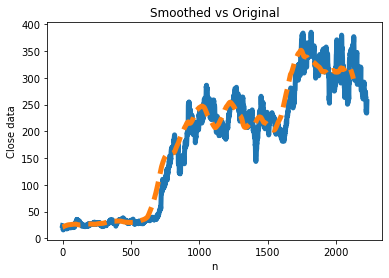

In [38]:
# plot smoothed_tsla_closing on top of tesla_np_closing

# Plot to see differences
fig, ax1 = plt.subplots()
plt.title('Smoothed vs Original')
plt.xlabel('n')
plt.ylabel('Close data')
ax1.plot(tesla_np_closing, linewidth = 5)
ax1.plot(smoothed_tsla_closing, linewidth = 5, linestyle = '--')
plt.show()

In [25]:
# Google closing prices, smooth_type = 'median', window_size = 150
# Note your smoothed data will be shorter than the original

smoothed_google_closing  = smooth_data(google_np_closing, smooth_type = 'median', window_size = 150)

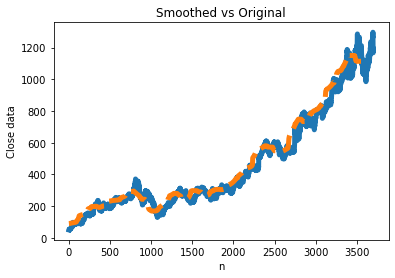

In [28]:
# plot smoothed_google_closing on top of google_np_closing

# Plot to see differences
fig, ax1 = plt.subplots()
plt.title('Smoothed vs Original')
plt.xlabel('n')
plt.ylabel('Close data')
ax1.plot(google_np_closing, linewidth = 5)
ax1.plot(smoothed_google_closing, linewidth = 5, linestyle = '--')
plt.show()

In [32]:
# Dow Jones Index closing prices, smooth_type = 'mean', window_size = 200
# Note your smoothed data will be shorter than the original

smoothed_dji_closing  = smooth_data(DJI_np_closing, smooth_type = 'mean', window_size = 200)

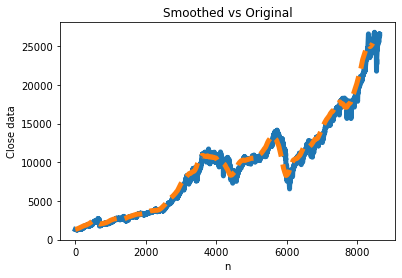

In [33]:
# plot smoothed_dji_closing on top of dji_np_closing

# Plot to see differences
fig, ax1 = plt.subplots()
plt.title('Smoothed vs Original')
plt.xlabel('n')
plt.ylabel('Close data')
ax1.plot(DJI_np_closing, linewidth = 5)
ax1.plot(smoothed_dji_closing, linewidth = 5, linestyle = '--')
plt.show()

## Extra credit: Code efficiency
### Achieve a runtime speed of < 50ms

In [30]:
timeit -n 1 -r 7 smoothed_google_closing  = smooth_data(google_np_closing, smooth_type = 'median', window_size = 150)

183 ms ± 6.59 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exercise 4: Ranking Daily Stock Surges/Crashes

<img src="lab4_exercise4.png" width="1000">

In [73]:
def detect_surge_crash(filepath, detect_type, num_output_dates):
    
#files turn into an easy to parse dictionary
    surge_dict = convert_csv_to_dict(filepath)
#gets change in price, end-start
    price_change = surge_dict['Close'] - surge_dict['Open']
#the sign of price_change is determined by detect_type. Because a crash is negative, multiplying by negative would 
#turn a crash to a sruge
    sign = -1 if detect_type == 'crash' else 1
    price_change *= sign
# argspartition only needs the large value indices only, so it only finds those
    indices = np.argpartition(price_change, -num_output_dates)[-num_output_dates:][::-1]
#price_change is multiplied by sign to turn crashes back to their original form(crash)
    price_change *= sign
    
#creates a list for dates and the price changes for the days 
    date_list = surge_dict['Date'][indices]
    price_change_list = price_change[indices]
    
    return date_list, price_change_list

In [74]:
date_list_t, price_change_list_t = detect_surge_crash(filepath = 'TSLA.csv', detect_type = 'surge', num_output_dates = 5)

In [75]:
print(date_list_t, price_change_list_t)

['2018-08-07' '2018-04-04' '2018-10-23' '2018-12-26' '2018-10-26'] [35.73001099999999 34.16000299999999 30.270019999999988 26.089995999999985
 22.649993999999992]


In [76]:
date_list_g, price_change_list_g = detect_surge_crash(filepath = 'GOOGL.csv', detect_type = 'crash', num_output_dates = 7)

In [77]:
print(date_list_g, price_change_list_g)

['2018-10-29' '2018-10-24' '2018-03-27' '2018-02-08' '2018-12-04'
 '2018-10-10' '2018-12-21'] [-61.81005899999991 -57.88000499999998 -56.96002199999998
 -52.159973000000036 -50.52001900000005 -44.239990000000034
 -40.79003899999998]


## Extra credit: Code efficiency
### Achieve a runtime speed of < 10ms

In [ ]:
timeit -n 1 -r 7 date_list_t, price_change_list_t = detect_surge_crash(filepath = 'TSLA.csv', detect_type = 'surge', num_output_dates = 5)

### Exercise 5: Human Debugger

<img src="lab4_exercise5.png" width="1200">

### Faulty function #1 

In [40]:
def average_data_per_col(arr_2d):
    
    # NOTE FROM YOUR FRIEND PREPARING FOR STARBUCKS SOFTWARE ENGINEER TECH INTERVIEW 
    """  The function takes numpy 2d array as an input, computes mean for each column data, and outputs 1D array 
         with the length equal to the # of columns.
         
         For some reason I keep getting errors.... I need your help to debug the code.
         I need this position so I can get free ice lattes... :(
    
    """
    
    # placeholder for averaged values
    averaged_data = ()
    
    # Loop through each column data to compute mean and append to averaged_data 
    for k in range(len(arr_2d[:, 0])):
        
        #averaged_column_data = np.mean(arr_2d[:, k])
        averaged_data.append(averaged_column_data)
        
    # Return numpy array form of the averaged_data
    return np.array(averaged_data)

In [41]:
# Load diabetes.csv and convert to numpy array

diabetes = pd.read_csv('diabetes.csv')
diabetes_np = diabetes.to_numpy()

In [42]:
# Run faulty function 1

averaged_diabetic_attributes =  average_data_per_col(diabetes_np)

AttributeError: 'tuple' object has no attribute 'append'

In [43]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def average_data_per_col_fixed(arr_2d):
    # Create a array of 0's to put the averages in. Length equal to the number of columns.
    averaged_data = np.zeros(len(arr_2d[0, :]))
    # Loop through all the columns.
    for k in range(0, len(arr_2d[0, :])):
        # Initialize sum variable.
        sum = 0
        # Loop through all the rows per column.
        for i in range(0, len(arr_2d[:, 0])):
            # Take the cumulative sum.
            sum += arr_2d[i][k]
        # Calculate average and put the average into the 1D array.
        averaged_data[k] = sum / len(arr_2d[:, 0])
    return averaged_data

In [44]:
# Test your fixed function

averaged_diabetic_attributes =  average_data_per_col_fixed(diabetes_np)

In [45]:
# Compare with correct results

correct_result_func1 = np.load('E5_correct_output_1.npy')

# Should return True if the result is correct
np.sum(np.round(correct_result_func1, 3) == np.round(averaged_diabetic_attributes, 3)) == len(correct_result_func1) 

True

### Faulty function #2

In [46]:
def daily_stock_change_2_normalized_percentage(opening_price_arr, closing_price_arr):
    
    # NOTE FROM YOUR FRIEND WHO INVESTED IN TESLA
    """  I want to write a function which takes 2 1D numpy arrays of each corresponding to opening/closing prices of stock
         and output 1D array of daily stock change in percentages. 
         
         I want the percentages scale to be in a scale such that 1 = 100%, -0.5 = -50%, 1.5 = 150%  etc.
         For example, day 1 opening: $10, day 1 closing: $15, change in scaled percecntage: 0.5.
         
         I am not really getting errors but the numbers don't look right... Can you help me?? :'( 
    
    """
    
    # placeholder for change percentage values
    change_percentages = np.zeros(len(opening_price_arr), dtype = 'int')
    
    # Loop through each opening/closing price to compute the change percentage
    for date_num in range(len(opening_price_arr)):
        
        change_percentages[date_num] = opening_price_arr[date_num] - closing_price_arr[date_num] / opening_price_arr[date_num]
    
    return change_percentages

In [47]:
# Load tsla.csv and convert to numpy array

tesla = pd.read_csv('TSLA.csv') 
tesla_np = tesla.to_numpy()

In [48]:
# Run faulty function 2

change_percentages = daily_stock_change_2_normalized_percentage(tesla_np[:, 1], tesla_np[:, 4])

In [49]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def daily_stock_change_2_normalized_percentage_fixed(opening_price_arr, closing_price_arr):
    # Don't use dtype int because then it makes everything an int and we want decimals.
    change_percentages = np.zeros(len(opening_price_arr))
    # Use parentheses to enclose the closing - opening or else Python will divide first (PEMDAS) and we don't want that. 
    # Also, notice that we switched opening and closing, this is because we were getting the correct value but negative. 
    # We could also multiply all values by negative 1 as a fix for this.
    for date_num in range(len(opening_price_arr)):
        change_percentages[date_num] = (closing_price_arr[date_num] - opening_price_arr[date_num]) / opening_price_arr[date_num]
    return change_percentages

In [50]:
# Test your fixed function

change_percentages = daily_stock_change_2_normalized_percentage_fixed(tesla_np[:, 1], tesla_np[:, 4])
print(change_percentages)

[ 0.25736837 -0.07599848 -0.12160004 ... -0.02026381 -0.00578363
  0.04580496]


In [51]:
# Compare with correct results

correct_result_func2 = np.load('E5_correct_output_2.npy')

# Should return True if the result is correct
np.sum(np.round(correct_result_func2, 3) == np.round(change_percentages, 3)) == len(correct_result_func2) 

True

### Faulty function #3

In [52]:
def subset_diabetes_by_age(diabetes_data):
    
    # NOTE FROM YOUR FRIEND WHO WORKS AT UW IHME
    """ The function takes diabetes pandas data frame as an input and outputs a subplot of 3 x 1 with three histograms.    
    
        Specifically, I want to divide the diabetes data into three age groups - 
            1. 20 to 40
            2. 40 to 60
            3. 60 to 80
            
        and plot 3 histograms of glucose distribution (50 bins per histogram) in 3 x 1 python subplots.
        
        I seem to be getting error from very beginning even before I divide the dataset....
        My coworkers at IHME prefer R rather than Python... so you are my only hope!  
    
    """
    
    # Extract the age column of the diabetes_data 
    age_column = diabetes_data[:, 8] 
    
    # Construct boolean mask for each age group 
    age_20_40_bool_mask = age_column > 20 + age_column < 40
    age_40_60_bool_mask = age_column > 40 + age_column < 60
    age_60_80_bool_mask = age_column > 60 + age_column < 80
    
    # Get glucose data for each age group via applying the boolean mask for each age group
    age_20_40_glucose = diabetes_data[age_20_40_bool_mask, 2]
    age_40_60_glucose = diabetes_data[age_40_60_bool_mask, 2]
    age_60_80_glucose = diabetes_data[age_60_80_bool_mask, 2]
    
    # Plot the histogram for each age group in 3 x 1 subplot
    fig = plt.figure(figsize=(15,7))
    
    plt.subplot(3,1,1)
    
    plt.hist(age_20_40_glucose, bins = 50)
    plt.title('Age 20 to 40', fontsize = 15)
    
    plt.subplot(3,1,2)
    
    plt.hist(age_40_60_glucose, bins = 50)
    plt.title('Age 40 to 60', fontsize = 15)
    
    plt.subplot(3,1,3)
    
    plt.hist(age_60_80_glucose, bins = 50)
    plt.title('Age 60 to 80', fontsize = 15)
    
    plt.tight_layout()
    
    plt.show()

In [53]:
# Load diabetes.csv as pandas dataframe

diabetes = pd.read_csv('diabetes.csv')

In [78]:
# Run faulty function 3

subset_diabetes_by_age(diabetes_data = diabetes)

TypeError: '(slice(None, None, None), 8)' is an invalid key

In [55]:
# YOUR FIXED FUNCTION HERE
# Make sure you comment on your fixes

def subset_diabetes_by_age_fixed(diabetes_data):
    # Changed panda data frame into a numpy array.
    diabetes_data = diabetes_data.to_numpy()
    # The column should be 7, it is true that it is the 8th column in the data set but recall that
    # indices start at 0.
    age_column = diabetes_data[:, 7] 
    # Use np.logical_and to compute 2 truth values. Both cases need to be true, hence we use and.
    age_20_40_bool_mask = np.logical_and(age_column > 20, age_column < 40)
    age_40_60_bool_mask = np.logical_and(age_column > 40, age_column < 60)
    age_60_80_bool_mask = np.logical_and(age_column > 60, age_column < 80)
    
    # All other code is fine
    age_20_40_glucose = diabetes_data[age_20_40_bool_mask, 2]
    age_40_60_glucose = diabetes_data[age_40_60_bool_mask, 2]
    age_60_80_glucose = diabetes_data[age_60_80_bool_mask, 2]
    fig = plt.figure(figsize=(15,7))
    plt.subplot(3,1,1)
    plt.hist(age_20_40_glucose, bins = 50)
    plt.title('Age 20 to 40', fontsize = 15)
    plt.subplot(3,1,2)
    plt.hist(age_40_60_glucose, bins = 50)
    plt.title('Age 40 to 60', fontsize = 15)
    plt.subplot(3,1,3)
    plt.hist(age_60_80_glucose, bins = 50)
    plt.title('Age 60 to 80', fontsize = 15)
    plt.tight_layout()
    plt.show()

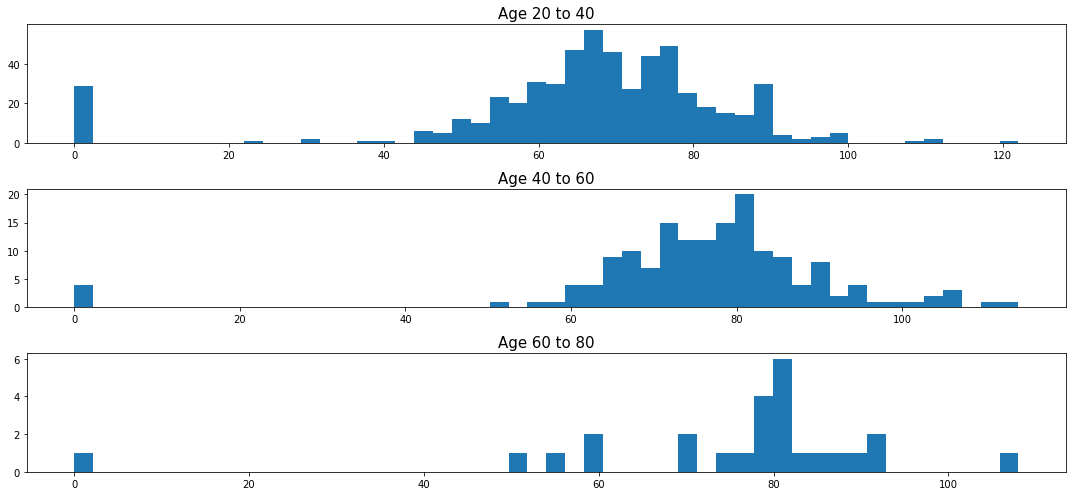

In [56]:
# Test your fixed function
# Compare your plot with the correct plot provided in template folder

subset_diabetes_by_age_fixed(diabetes_data = diabetes)